In [59]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
import warnings
warnings.filterwarnings('ignore')

In [21]:
# function for plotting density plots
def plot_density(numeric_feature):
    target = ['yes','no']
    for i in target:
        subset = data[data['y']== i]

        sns.distplot(subset[numeric_feature],hist=False,label=i)


In [63]:
# Read Data
data =pd.read_csv('bank/bank.csv',sep=';')
# Dropped duration column
data.drop(columns='duration',inplace=True)

   ## About Data
   
   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 
   
   #####   **The classification goal is to predict if the client will subscribe a term deposit (variable y).**
   

In [4]:
%%capture
print('Total Data points: ',len(data))
print('\nBlank or Null Values\n',data.isnull().sum(),sep='')

# Data does not have any null values

In [5]:
# Feature and Target Variables
print('Features:',data.columns[:-1],sep='\n')

Features:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')


In [69]:
# Categorical and Numerical features
col_cat = ['job','marital','education','default','housing','loan','contact','month','poutcome']
col_num = ['age','balance','day','campaign','pdays','previous']

   ## Data Description
   
   ### Bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
  
  ### Related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
  ### Other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


  ### Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


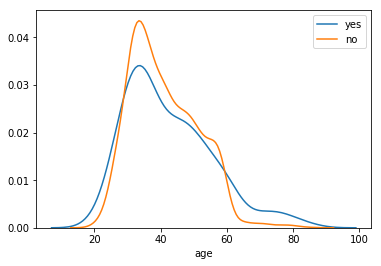

In [22]:
plot_density('age')

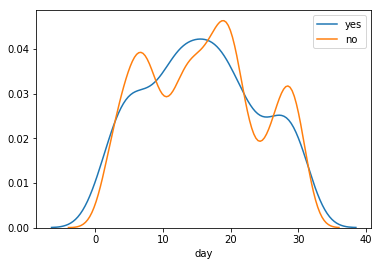

In [23]:
plot_density('day')

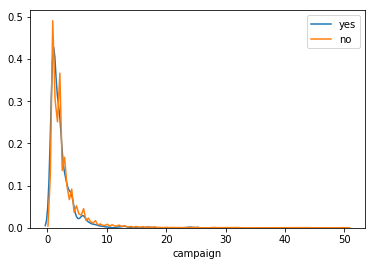

In [47]:
plot_density('campaign')

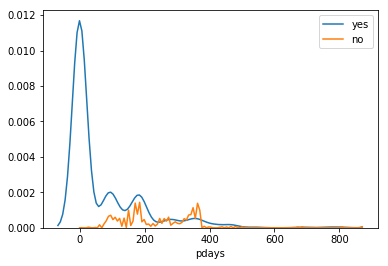

In [48]:
plot_density('pdays')

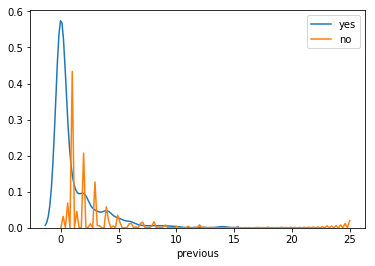

In [49]:
plot_density('previous')

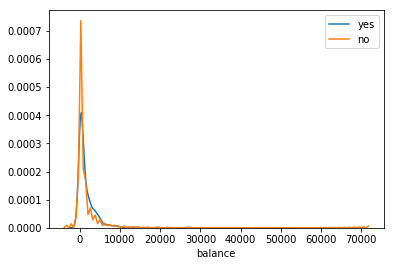

In [50]:
plot_density('balance')

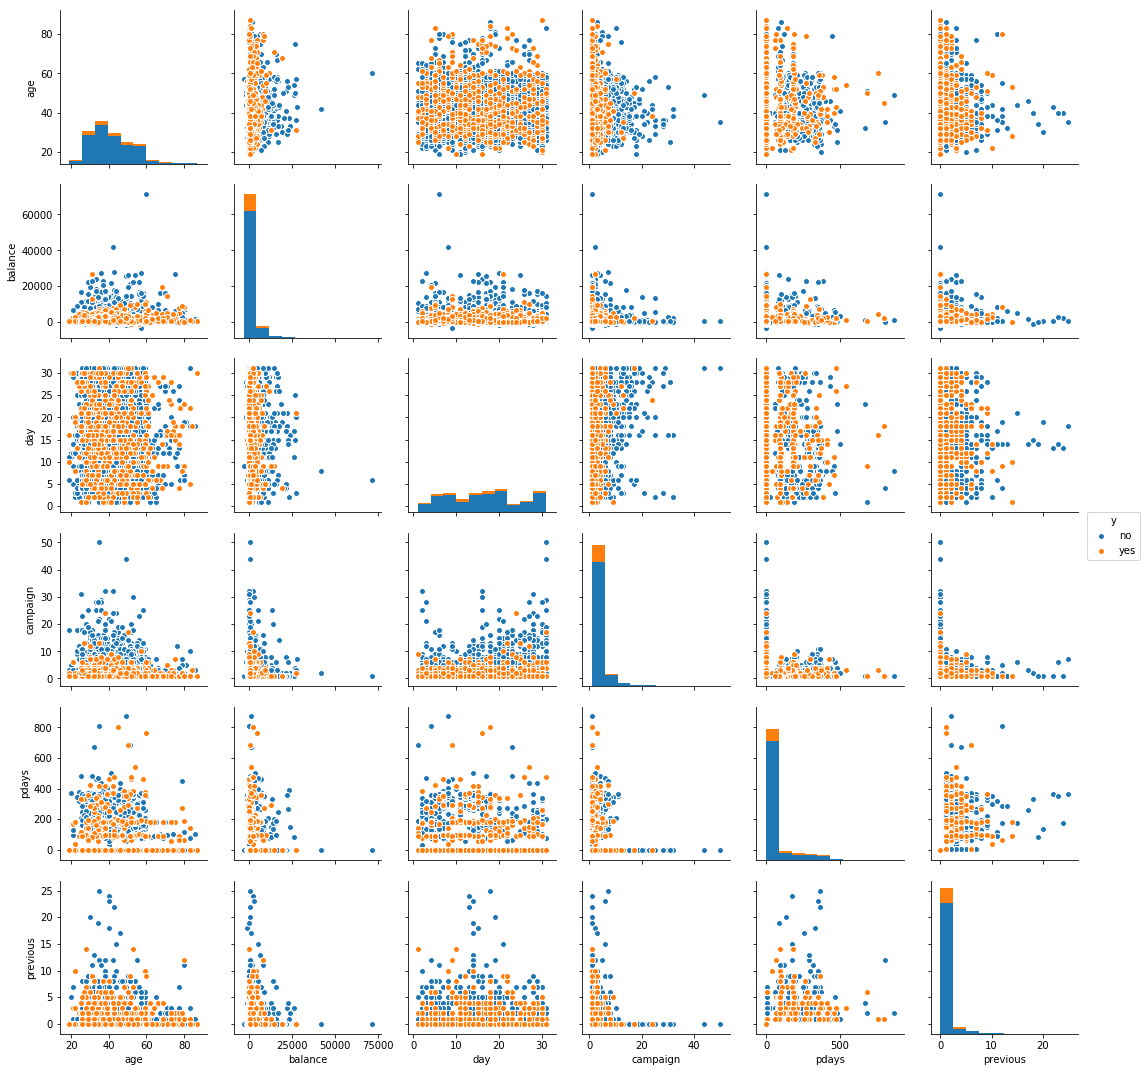

In [51]:
sns.pairplot(data,hue ='y');

In [46]:
data['balance'][data['balance']<0].unique()

array([  -88,  -221,  -849,  -516,  -195,  -231,   -55,  -715,  -970,
        -249,  -256,  -465,   -62, -1206,  -196,  -350,  -253,   -22,
        -204,  -247,  -189,  -988,  -220,  -701,  -311,   -67,  -140,
        -379,  -396,  -285,  -402,  -370,  -606,  -404,  -381,  -839,
        -228,  -302,  -339,  -558,   -53,   -49,   -45,   -84,  -117,
         -12,  -635,  -162,   -41,   -32,  -230, -1212,  -202,  -216,
         -75,  -244,  -151,  -298,  -932,  -148,  -105, -1680,  -461,
        -255,  -459,  -139,   -29,   -76,   -63,  -119,   -51,  -342,
        -454,   -70,  -388,  -535,  -568,  -905,  -502,  -218,   -10,
        -411,  -337,  -182,  -470,   -33,    -6,   -79,  -632,   -11,
         -56,   -98,  -129,   -97,  -217,  -921,   -14,  -583,  -346,
        -584,  -888,  -194,  -319,  -296,  -386,  -335,  -563,   -28,
        -423,  -124,   -94,  -113,    -7,   -99,    -2,  -183,  -306,
        -312,  -191,  -405,  -278,   -47,  -469,  -336,    -1,  -219,
        -435,  -101,

In [23]:
data['day'].value_counts().sort_values();

In [6]:
# Dataset 
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no


In [7]:
# Exploratory Data Analysis
round(data.describe(),2)

,age,balance,day,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,2.79,39.77,0.54
std,10.58,3009.64,8.25,3.11,100.12,1.69
min,19.00,-3313.00,1.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,50.00,871.00,25.00


In [ ]:
# people with housing or personal loan are more likely to say no for opening term deposit account
# remove unknown from contact method
# remove unknown","other" from poutcome
# remove day as both yes and no have same almost same distribution
# look further into month
# drop campaign: same distribution for both yes and no
# outlier removal
# retired and students are more likely to open deposit account
# blue collar employee are less likely to open deposit account

In [70]:
# Outliers removal
col_rm = col_num.copy()
col_rm.remove('pdays')
for i in col_rm:
    q75 = np.percentile(data[i], 75)
    q25 = np.percentile(data[i], 25)
    iqru = (q75 - q25)*1.5
    uplim = q75 + iqru
    lolim = q25 - iqru
    if uplim > np.max(data[i]):
        data[i][data[i]> uplim] = uplim
    if lolim < np.min(data[i]):
        data[i][data[i]<lolim] = lolim
data['pdays'][data['pdays']== -1] = 0 


In [72]:
round(data.describe(),2);

In [77]:
# %%capture
data_categorical = pd.get_dummies(data[col_cat])
data_categorical.drop(columns=['job_unknown','education_unknown','contact_unknown','poutcome_other','poutcome_unknown'])
data_categorical.columns

KeyError: "labels ['job_unknown' 'education_unknown' 'contact_unknown' 'poutcome_other'\n 'poutcome_unknown'] not contained in axis"

In [ ]:
data_numerical = data[col_num]
data_set = pd.concat([data_categorical,data_numerical],axis = 1)

In [9]:
# from sklearn.ensemble import RandomForestClassifier
# from boruta import BorutaPy
# X =data_set.values
# y = data['y']
# y = y.ravel()
# rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
# feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
# feat_selector.fit(X, y)
# feat_selector.support_
# feat_selector.ranking_
# X_filtered = feat_selector.transform(X)

# x_feat = data_set.copy()
# drop_col = x_feat.columns[feat_selector.ranking_ > 1]
# x_feat.drop(drop_col,axis = 1, inplace=True)

In [10]:
y = data['y'].copy()
y[y== 'no'] = -1
y[y == 'yes'] = 1

y=y.astype('str')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_set, y, test_size=0.30, random_state=0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
from sklearn.svm import SVC 
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(x_train,y_train)
predicted_label = svclassifier.predict(x_test)

 Classification Report
             precision    recall  f1-score   support

         -1       0.89      0.99      0.94      1190
          1       0.71      0.14      0.24       167

avg / total       0.87      0.89      0.85      1357

Confusion Metrics: 
 [[1180   10]
 [ 143   24]]


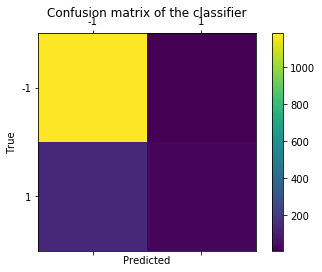

Test Accuracy of svm is 88.73%


In [12]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predicted_label)
print(f' Classification Report\n{report}')

from sklearn import metrics
labels=['-1','1']
cm = metrics.confusion_matrix(y_test, predicted_label, labels)
print(f'Confusion Metrics: \n {cm}')
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

score=svclassifier.score(x_test,y_test)*100
print(f'Test Accuracy of svm is {round(score,2)}%')

In [13]:
# with Radial Basis Function 
# from sklearn import metrics
svclassifier = SVC(kernel = 'rbf')
svclassifier.fit(x_train,y_train)
predicted_label = svclassifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predicted_label, labels)
score=svclassifier.score(x_test,y_test)*100
print(f'Test Accuracy of svm is {round(score,2)}%')

Test Accuracy of svm is 88.43%


In [14]:
logreg =LogisticRegression()
logreg.fit(x_train,y_train)
prediction = logreg.predict(x_test)

 Classification Report
             precision    recall  f1-score   support

         -1       0.89      0.99      0.94      1190
          1       0.70      0.11      0.20       167

avg / total       0.87      0.89      0.85      1357

Confusion Metrics: 
 [[1182    8]
 [ 148   19]]


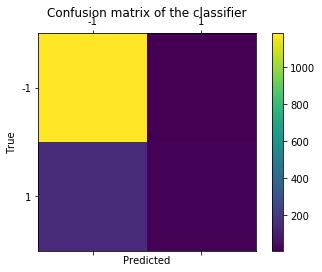

Test Accuracy of logistic model 88.5%


In [16]:
from sklearn.metrics import classification_report
report = classification_report(y_test, prediction)
print(f' Classification Report\n{report}')


from sklearn import metrics
labels=['-1','1']
cm = metrics.confusion_matrix(y_test, prediction, labels)
print(f'Confusion Metrics: \n {cm}')
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

score=logreg.score(x_test,y_test)*100
print(f'Test Accuracy of logistic model {round(score,2)}%')